To determine if I am successful, lets say we want less than a 5% error rate, then ch

In [84]:
0.95**20

0.3584859224085419

In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np

In [204]:
total[['Size','Volume','x1','y1','x2','y2','length','Degrees']]

,Size,Volume,x1,y1,x2,y2,length,Degrees
0,490,4719.669481,64,55,55,26,30.364453,-107.241459
1,488,4675.379994,64,55,55,26,30.364453,-107.241459
2,489,4455.994228,64,55,54,26,30.675723,-109.025606
3,489,4294.944653,64,55,55,26,30.364453,-107.241459
4,482,4335.963254,65,55,53,26,31.384710,-112.479434
...,...,...,...,...,...,...,...,...
18100194,728,7079.193898,72,73,61,28,46.324939,-103.736268
18100195,722,7004.016659,72,75,62,32,44.147480,-103.091893
18100196,762,8223.656182,72,75,63,31,44.911023,-101.560131
18100197,759,8061.811191,71,75,63,31,44.721360,-100.304846


In [205]:
total = pd.read_csv("C:\\Users\\TheurerJ\\Documents\\Data\\Line_Data.csv")
total['Degrees'] = np.degrees(np.arctan2(total['y2'].to_numpy()-total['y1'].to_numpy(),total['x2'].to_numpy()-total['x1'].to_numpy()))
grouped = total.groupby("Filename",sort = False).count()
med_grouped = total.groupby("Filename").median()
std_grouped = total.groupby("Filename").std()
mean_grouped = total.groupby("Filename").mean()
range_grouped = total.groupby("Filename")[['Size','Volume','x1','y1','x2','y2','length','Degrees']].quantile(0.9)-total.groupby("Filename")[['Size','Volume','x1','y1','x2','y2','length','Degrees']].quantile(0.1)
inital_mask = (grouped["Size"]>32) & (grouped["Problem"]==0)

In [290]:
grouped.head()

,frame number,Size,Volume,x1,y1,x2,y2,length,Problem,Degrees
Filename,,,,,,,,,,
1AFJUFVQ.avi,118,118,118,118,118,118,118,118,0,118
1AG1LTSE.avi,134,134,134,134,134,134,134,134,0,134
1AG6EOVQ.avi,142,142,142,142,142,142,142,142,42,142
1AGCWGMH.avi,169,169,169,169,169,169,169,169,0,169
1AGV8XHL.avi,246,246,246,246,246,246,246,246,49,246


(array([1.000e+00, 1.000e+00, 1.100e+02, 7.300e+01, 7.600e+01, 5.900e+01,
        8.100e+01, 1.820e+02, 1.910e+02, 3.000e+02, 4.120e+02, 5.060e+02,
        5.210e+02, 5.400e+02, 5.690e+02, 7.730e+02, 8.240e+02, 1.057e+03,
        1.226e+03, 1.362e+03, 1.637e+03, 1.980e+03, 2.238e+03, 3.116e+03,
        3.083e+03, 3.268e+03, 3.653e+03, 3.843e+03, 3.984e+03, 4.423e+03,
        4.567e+03, 4.523e+03, 4.361e+03, 4.550e+03, 4.279e+03, 3.983e+03,
        3.846e+03, 3.734e+03, 3.517e+03, 4.154e+03, 3.789e+03, 2.573e+03,
        2.320e+03, 1.978e+03, 1.766e+03, 1.561e+03, 1.411e+03, 1.211e+03,
        1.091e+03, 9.147e+03]),
 array([  1.  ,   5.98,  10.96,  15.94,  20.92,  25.9 ,  30.88,  35.86,
         40.84,  45.82,  50.8 ,  55.78,  60.76,  65.74,  70.72,  75.7 ,
         80.68,  85.66,  90.64,  95.62, 100.6 , 105.58, 110.56, 115.54,
        120.52, 125.5 , 130.48, 135.46, 140.44, 145.42, 150.4 , 155.38,
        160.36, 165.34, 170.32, 175.3 , 180.28, 185.26, 190.24, 195.22,
        200.2 , 

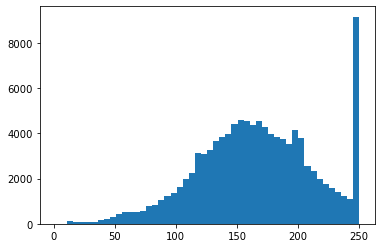

In [291]:
plt.hist(grouped['frame number'],bins=50)

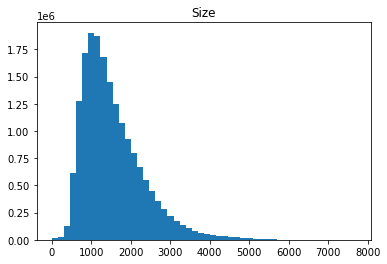

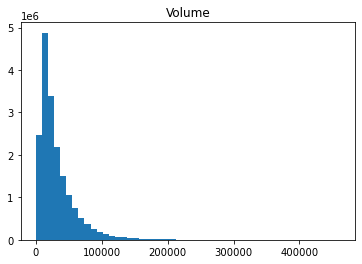

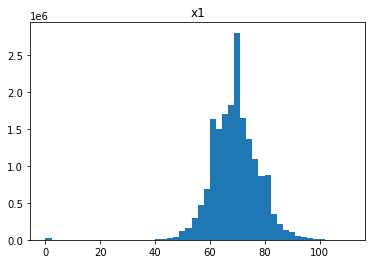

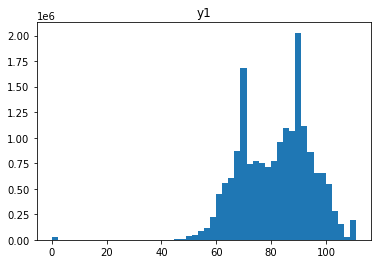

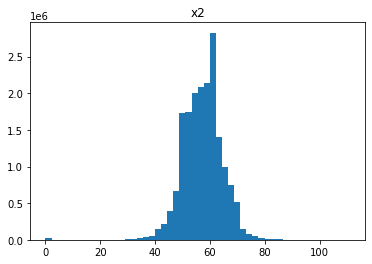

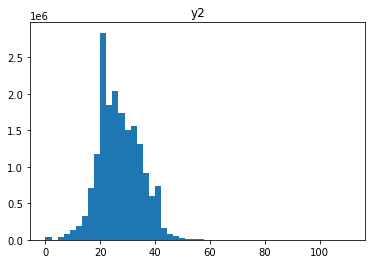

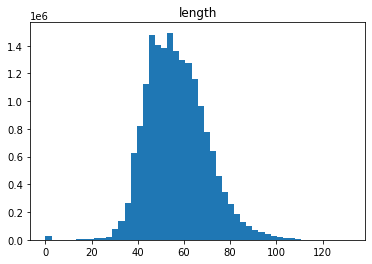

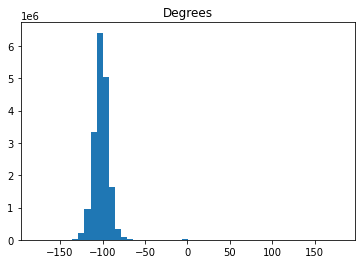

,frame number,Size,Volume,x1,y1,x2,y2,length,Degrees
count,1.810020e+07,1.810020e+07,1.810020e+07,1.810020e+07,1.810020e+07,1.810020e+07,1.810020e+07,1.810020e+07,1.810020e+07
mean,8.986277e+01,1.549118e+03,3.144160e+04,6.917751e+01,8.189226e+01,5.734409e+01,2.697977e+01,5.673553e+01,-1.017952e+02
std,5.824986e+01,7.785258e+02,2.812042e+04,8.471938e+00,1.295455e+01,7.183818e+00,7.748476e+00,1.291094e+01,9.313073e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.786361e+02
25%,4.100000e+01,9.860000e+02,1.294785e+04,6.400000e+01,7.100000e+01,5.300000e+01,2.200000e+01,4.738143e+01,-1.069275e+02
50%,8.400000e+01,1.370000e+03,2.256766e+04,6.900000e+01,8.300000e+01,5.700000e+01,2.600000e+01,5.557877e+01,-1.018887e+02
75%,1.310000e+02,1.941000e+03,4.054263e+04,7.400000e+01,9.100000e+01,6.200000e+01,3.200000e+01,6.500000e+01,-9.691123e+01
max,2.490000e+02,7.707000e+03,4.616921e+05,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.317649e+02,1.800000e+02


In [206]:
numerical = ['Size','Volume','x1','y1','x2','y2','length','Degrees']
for col in numerical:
    plt.hist(total[col],bins=50)
    plt.title(col)
    plt.show()
total.describe()

Comments:

Size is right tailed, can possibly eliminate from the >3000 set

volume is right tailed, can possibly eliminate from the > 100000 set

x1 is bellshaped esque, can possibly eliminate from +=2 std

y1 is bimodal, can possibly eliminate from <80 set

x2 is bellshaped, +-2 std

y2 is bellshaped

length is bellshaped

degrees is very narro, can possibly eliminate outside the main 4 bins

In [216]:
print("Size is right tailed, can possibly eliminate from the >3000 set")
data = total[total.Size>3000].Filename.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

Size is right tailed, can possibly eliminate from the >3000 set
14.345781466113417 %
Videos to check ['6ICHLPJ3.avi' '7QWCN61Y.avi' '2MP7J3FL.avi' 'BPREGNA5.avi'
 'BS2WQ4L4.avi']


In [217]:
print("volume is right tailed, can possibly eliminate from the > 100000 set")
data = total[total.Volume>100000].Filename.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

volume is right tailed, can possibly eliminate from the > 100000 set
9.278930382664823 %
Videos to check ['EEOSAEVG.avi' '7SQU1ZU9.avi' '5AP6P68T.avi' '5B6VUWO0.avi'
 '6GIHP75W.avi']


In [259]:
print("x1 is bellshaped esque, can possibly eliminate from +=2 std")
mean = np.mean(total.x1)
std = np.std(total.x1)
data = total[~(total.x1.between(mean-2*std,mean+2*std))].Filename.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

x1 is bellshaped esque, can possibly eliminate from +=2 std
16.772706316274782 %
Videos to check ['1HSBE3OA.avi' '1F2KPSQF.avi' 'BRMJJSGT.avi' 'BSZZNAOO.avi'
 'E3P6V2VQ.avi']


In [241]:
print("y1 is bimodal, can possibly eliminate from <80 set")
data = total[total.y1<80].Filename.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

y1 is bimodal, can possibly eliminate from <80 set
63.248501613646845 %
Videos to check ['D1KUNF4G.avi' '1JMT2ZVN.avi' '43YZ40DM.avi' '5HL3GAUJ.avi'
 '1BUZ3KE9.avi']


In [242]:
print("x2 is bellshaped esque, can possibly eliminate from +=2 std")
mean = np.mean(total.x2)
std = np.std(total.x2)
data = total[~(total.x2.between(mean-2*std,mean+2*std))].Filename.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

x2 is bellshaped esque, can possibly eliminate from +=2 std
17.127708621484555 %
Videos to check ['96CSHX3F.avi' '7O54GRR5.avi' '1CB6GEKU.avi' 'AEXYKUM4.avi'
 '6RJ90MB4.avi']


In [243]:
print("y2 is bellshaped esque, can possibly eliminate from +=2 std")
mean = np.mean(total.y2)
std = np.std(total.y2)
data = total[~(total.y2.between(mean-2*std,mean+2*std))].Filename.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

y2 is bellshaped esque, can possibly eliminate from +=2 std
13.97602581834947 %
Videos to check ['563TA9U0.avi' 'BSZTJP5E.avi' '46ABMF6I.avi' '563NEKK6.avi'
 '2RAXF1II.avi']


In [244]:
print("length is bellshaped esque, can possibly eliminate from +=2 std")
mean = np.mean(total.length)
std = np.std(total.length)
data = total[~(total.length.between(mean-2*std,mean+2*std))].Filename.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

length is bellshaped esque, can possibly eliminate from +=2 std
17.65329644997695 %
Videos to check ['42M0MHK0.avi' 'AGRHHX10.avi' 'BPBUE0WO.avi' 'AIMAG1G1.avi'
 '3VPY5BGQ.avi']


In [255]:
print("degrees is very narro, can possibly eliminate outside the main 4 bins")
mean = -101#np.mean(total.Degrees)
std = 6#np.std(total.Degrees)
data = total[~(total.Degrees.between(mean-2*std,mean+2*std))].Filename.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

degrees is very narro, can possibly eliminate outside the main 4 bins
48.93775933609958 %
Videos to check ['942RKLT5.avi' 'D13BSGVQ.avi' '484Z9QBL.avi' '1LYNDY75.avi'
 '1J69KX2H.avi']


# Done with total, now onto mean

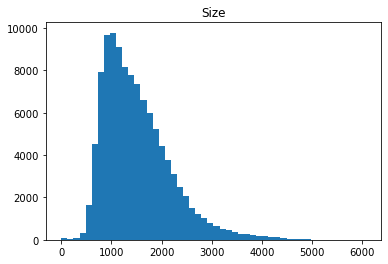

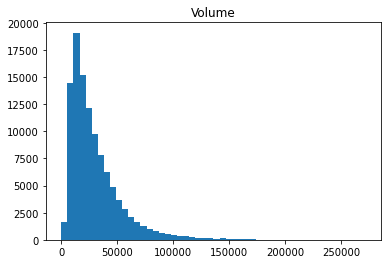

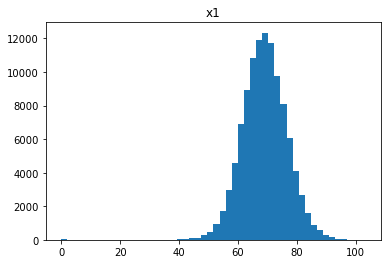

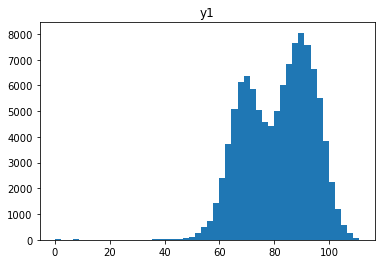

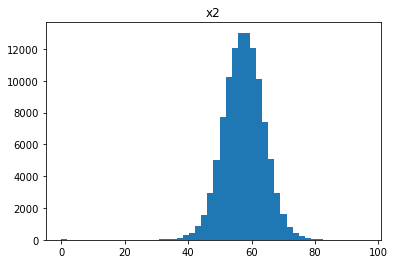

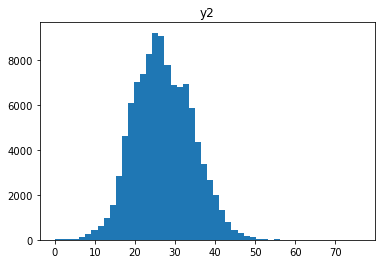

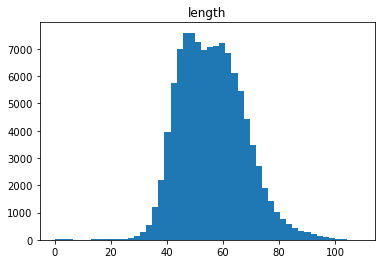

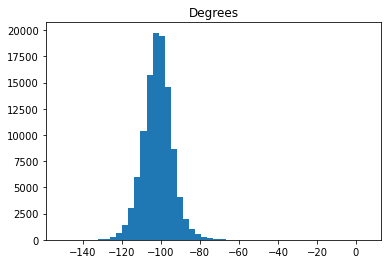

,frame number,Size,Volume,x1,y1,x2,y2,length,Degrees
count,108450.000000,108450.000000,108450.000000,108450.000000,108450.000000,108450.000000,108450.000000,108450.000000,108450.000000
mean,82.950277,1512.396030,30188.776894,68.999567,81.377693,57.504131,27.059928,56.087036,-101.534947
std,24.017686,679.128571,23837.300877,7.657666,12.316706,6.441522,7.300609,11.639983,7.936075
min,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-151.032339
25%,67.000000,1004.784643,13901.503924,64.111111,71.066667,53.359608,21.816256,47.233952,-106.178538
50%,82.500000,1376.610014,23286.796219,68.988220,83.038420,57.552232,26.607143,55.347739,-101.585358
75%,99.500000,1868.316580,38880.715883,73.917419,91.246855,61.747404,32.203987,63.804101,-97.156291
max,124.500000,6063.808000,271569.837355,103.444000,111.000000,96.000000,76.000000,108.594443,4.934287


In [275]:
numerical = ['Size','Volume','x1','y1','x2','y2','length','Degrees']
for col in numerical:
    plt.hist(mean_grouped[col],bins=50)
    plt.title(col)
    plt.show()
mean_grouped.describe()

Comments:

Size is right tailed, can possibly eliminate from the >2000 set

volume is right tailed, can possibly eliminate from the > 50000 set

x1 is bellshaped esque, can possibly eliminate from +=2 std

y1 is bimodal, can possibly eliminate from <80 or > 80 set

x2 is bellshaped, +-2 std

y2 is bellshaped

length is bellshaped

degrees is very narro, can possibly eliminate outside the main 4 bins

In [260]:
print("Size is right tailed, can possibly eliminate from the >2000 set")
data = mean_grouped[mean_grouped.Size>2000].index.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

Size is right tailed, can possibly eliminate from the >2000 set
20.177962194559704 %
Videos to check ['ADJPXVEZ.avi' 'BNH7C8NS.avi' 'E8AWCBHM.avi' 'FE2W0SSI.avi'
 '7TNWQI0J.avi']


In [261]:
print("volume is right tailed, can possibly eliminate from the > 100000 set")
data = mean_grouped[mean_grouped.Volume>50000].index.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

volume is right tailed, can possibly eliminate from the > 100000 set
14.934993084370678 %
Videos to check ['D2HXH8ES.avi' 'E6WMKPV9.avi' '41O49TXR.avi' 'BQP508LT.avi'
 'AEH4B2Y4.avi']


In [263]:
print("x1 is bellshaped esque, can possibly eliminate from +=2 std")
mean = np.mean(mean_grouped.x1)
std = np.std(mean_grouped.x1)
data = mean_grouped[~(mean_grouped.x1.between(mean-2*std,mean+2*std))].index.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

x1 is bellshaped esque, can possibly eliminate from +=2 std
4.097740894421392 %
Videos to check ['6Q5H0EDN.avi' 'D0NS77A5.avi' 'ECFEYWL4.avi' '5BMLCYA7.avi'
 'FKZMKRCM.avi']


In [267]:
print("y1 is bimodal, can possibly eliminate from <80 set")
data = mean_grouped[mean_grouped.y1<80].index.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

y1 is bimodal, can possibly eliminate from <80 set
43.453204241585986 %
Videos to check ['3W5HS0LQ.avi' '571VPQSX.avi' 'EDTCY7RF.avi' '2OZEJBCL.avi'
 '484H26Y9.avi']


In [268]:
print("x2 is bellshaped esque, can possibly eliminate from +=2 std")
mean = np.mean(mean_grouped.x2)
std = np.std(mean_grouped.x2)
data = mean_grouped[~(mean_grouped.x2.between(mean-2*std,mean+2*std))].index.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

x2 is bellshaped esque, can possibly eliminate from +=2 std
4.024896265560166 %
Videos to check ['6F5DSDCS.avi' '3Y0B34GG.avi' 'BTH10RPD.avi' 'BIEYCX69.avi'
 '564YO5IY.avi']


In [269]:
print("y2 is bellshaped esque, can possibly eliminate from +=2 std")
mean = np.mean(mean_grouped.y2)
std = np.std(mean_grouped.y2)
data = mean_grouped[~(mean_grouped.y2.between(mean-2*std,mean+2*std))].index.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

y2 is bellshaped esque, can possibly eliminate from +=2 std
4.150299677270632 %
Videos to check ['1GEP7AAA.avi' '3X38CDDB.avi' '2T4WRITD.avi' 'CTRDG4OP.avi'
 '1O7UQWJY.avi']


In [270]:
print("length is bellshaped esque, can possibly eliminate from +=2 std")
mean = np.mean(mean_grouped.length)
std = np.std(mean_grouped.length)
data = mean_grouped[~(mean_grouped.length.between(mean-2*std,mean+2*std))].index.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

length is bellshaped esque, can possibly eliminate from +=2 std
3.79253112033195 %
Videos to check ['4778GQRE.avi' 'D20K7WOK.avi' 'D4BF5S24.avi' 'D2YB4KYK.avi'
 'EF5BWL8R.avi']


In [272]:
print("degrees is very narro, can possibly eliminate outside the main 4 bins")
mean = -101#np.mean(total.Degrees)
std = 6#np.std(total.Degrees)
data = mean_grouped[~(mean_grouped.Degrees.between(mean-2*std,mean+2*std))].index.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

degrees is very narro, can possibly eliminate outside the main 4 bins
10.16781927155371 %
Videos to check ['6S0RVKBJ.avi' 'CU7QZFZB.avi' '3UTDBL2S.avi' '1BDLYBOZ.avi'
 '2KF0KXGE.avi']


# std

C:\Users\TheurerJ\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\TheurerJ\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


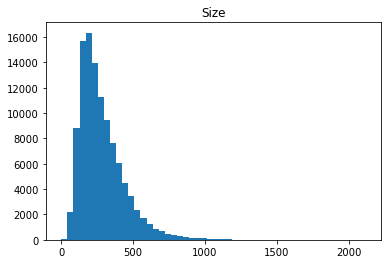

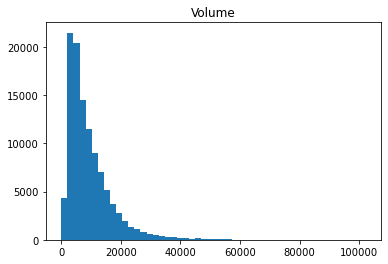

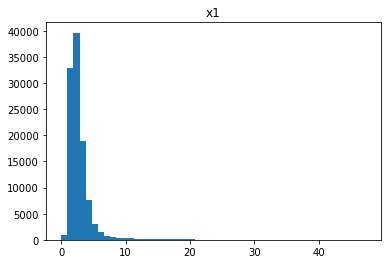

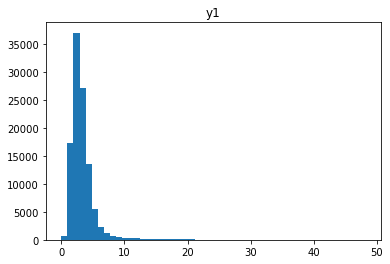

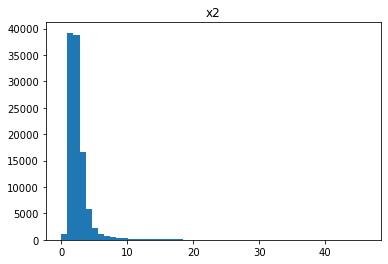

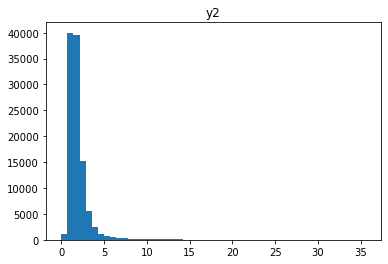

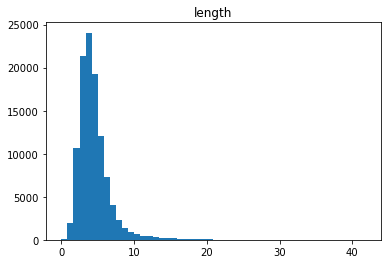

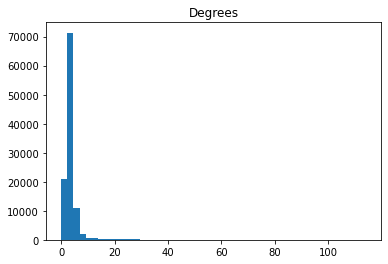

,frame number,Size,Volume,x1,y1,x2,y2,length,Degrees
count,108449.000000,108449.000000,108449.000000,108449.000000,108449.000000,108449.000000,108449.000000,108449.000000,108449.000000
mean,48.324133,282.229884,9414.661105,2.862770,3.407613,2.597447,1.991127,4.514102,3.771123
std,13.866781,158.157921,7674.376249,2.460470,2.677663,2.184005,1.709508,2.376410,3.918612
min,3.027650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.115214,169.990430,4195.425690,1.759329,2.187477,1.610386,1.242828,3.108244,2.419922
50%,48.064193,244.474640,7163.410090,2.317573,2.873140,2.109940,1.605087,4.040513,3.019086
75%,57.879185,356.924315,12256.514717,3.138913,3.815667,2.852187,2.153113,5.256378,3.887804
max,72.312977,2116.511650,102166.352722,47.306826,48.227728,46.120638,35.557865,41.833174,114.024071


In [274]:
numerical = ['Size','Volume','x1','y1','x2','y2','length','Degrees']
for col in numerical:
    plt.hist(std_grouped[col],bins=50)
    plt.title(col)
    plt.show()
std_grouped.describe()

Comments:

Size is right tailed, can possibly eliminate from the >500 set

volume is right tailed, can possibly eliminate from the > 20000 set

x1 is right tailed, can possibly eliminate from .9 quantile

y1 is right tailed, can possibly eliminate from .9 quantile

x2 is right tailed, can possibly eliminate from .9 quantile

y2 is right tailed, can possibly eliminate from .9 quantile

length is right tailed, can possibly eliminate from .9 quantile

degrees is very narro, can possibly eliminate outside the 0.9 quantile

In [277]:
frame = std_grouped

In [278]:
print("Size is right tailed, can possibly eliminate from the >2000 set")
data = frame[frame.Size>500].index.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

Size is right tailed, can possibly eliminate from the >2000 set
8.766251728907331 %
Videos to check ['7Z61BAO0.avi' '5D0PHZ7T.avi' 'FPKTXVTP.avi' '1JNSI9N4.avi'
 '1DOSRRJL.avi']


In [279]:
print("volume is right tailed, can possibly eliminate from the > 20000 set")
data = frame[frame.Volume>50000].index.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

volume is right tailed, can possibly eliminate from the > 20000 set
0.28031350852927617 %
Videos to check ['2WT21I7U.avi' '2TL4D5XR.avi' 'D4RSOVL1.avi' '59SA70OJ.avi'
 '7WG51QKF.avi']


In [283]:
print("x1 is right tailed, can possibly eliminate from 3 quartile")
mean = np.mean(frame.x1)
std = np.std(frame.x1)
data = frame[frame.x1>frame.x1.quantile(0.9)].index.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

x1 is right tailed, can possibly eliminate from 3 quartile
10.0 %
Videos to check ['7WG51K8M.avi' 'D20K9RSG.avi' 'E9NV0HMM.avi' 'CTQJOFYE.avi'
 'E6WYD7SR.avi']


In [284]:
print("y1 is right tailed, can possibly eliminate from 3 quartile")
data = frame[frame.y1>frame.y1.quantile(0.9)].index.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

y1 is right tailed, can possibly eliminate from 3 quartile
10.0 %
Videos to check ['E96ANRMR.avi' '6RJKR2KJ.avi' '3W6HM347.avi' 'FBS6UYHF.avi'
 'CU72XHJP.avi']


In [285]:
print("x2 is right tailed, can possibly eliminate from 3 quartile")
data = frame[frame.x2>frame.x2.quantile(0.9)].index.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

x2 is right tailed, can possibly eliminate from 3 quartile
10.0 %
Videos to check ['476WMOU8.avi' '7ZNWDNJ9.avi' '6F5DC9TM.avi' '47N3ZBXP.avi'
 '2KVE8DDN.avi']


In [286]:
print("y2 is right tailed, can possibly eliminate from 3 quartile")
data = frame[frame.y2>frame.y2.quantile(0.9)].index.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

y2 is right tailed, can possibly eliminate from 3 quartile
10.0 %
Videos to check ['9BVX1PP9.avi' '5APP0BH6.avi' 'D57C5761.avi' '46QVAKMS.avi'
 '1HCM04GC.avi']


In [287]:
print("length is right tailed, can possibly eliminate from 3 quartile")
data = frame[frame.length>frame.length.quantile(0.9)].index.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

length is right tailed, can possibly eliminate from 3 quartile
10.0 %
Videos to check ['1CB0XB5X.avi' '5GOUFC9P.avi' 'EA4QCCZ7.avi' 'FLFI4AIU.avi'
 'BSJXX0AQ.avi']


In [288]:
print("Degrees is right tailed, can possibly eliminate from 3 quartile")
data = frame[frame.Degrees>frame.Degrees.quantile(0.9)].index.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

Degrees is right tailed, can possibly eliminate from 3 quartile
10.0 %
Videos to check ['E8QF2TBR.avi' 'BVA5JC32.avi' '8YKB6ZLC.avi' '1BTBIDPV.avi'
 '6GIZME5B.avi']


# Range

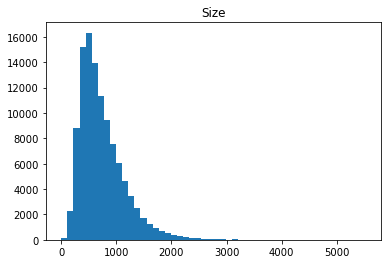

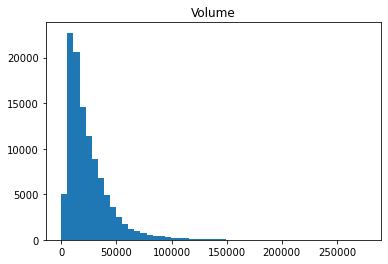

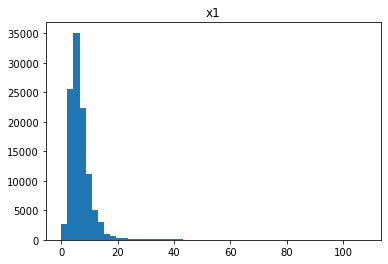

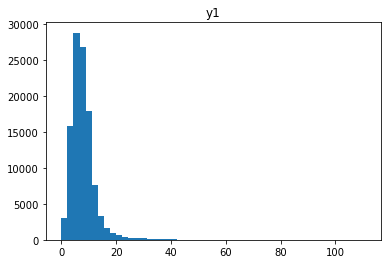

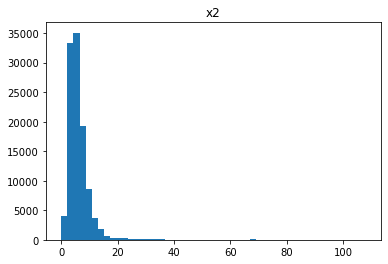

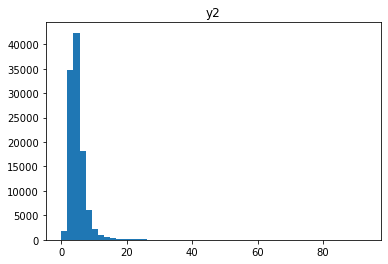

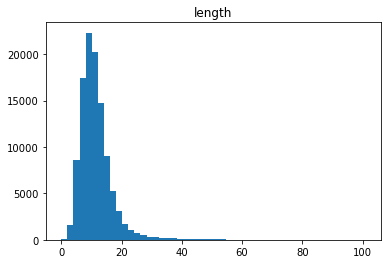

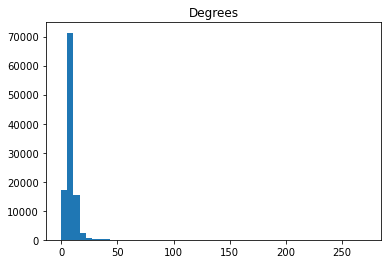

,frame number,Size,Volume,x1,y1,x2,y2,length,Degrees
count,108449.000000,108449.000000,108449.000000,108449.000000,108449.000000,108449.000000,108449.000000,108449.000000,108449.000000
mean,48.324133,282.229884,9414.661105,2.862770,3.407613,2.597447,1.991127,4.514102,3.771123
std,13.866781,158.157921,7674.376249,2.460470,2.677663,2.184005,1.709508,2.376410,3.918612
min,3.027650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.115214,169.990430,4195.425690,1.759329,2.187477,1.610386,1.242828,3.108244,2.419922
50%,48.064193,244.474640,7163.410090,2.317573,2.873140,2.109940,1.605087,4.040513,3.019086
75%,57.879185,356.924315,12256.514717,3.138913,3.815667,2.852187,2.153113,5.256378,3.887804
max,72.312977,2116.511650,102166.352722,47.306826,48.227728,46.120638,35.557865,41.833174,114.024071


In [289]:
numerical = ['Size','Volume','x1','y1','x2','y2','length','Degrees']
for col in numerical:
    plt.hist(range_grouped[col],bins=50)
    plt.title(col)
    plt.show()
std_grouped.describe()

# TODO: Comments and below

In [277]:
frame = range_grouped

In [278]:
print("Size is right tailed, can possibly eliminate from the >2000 set")
data = frame[frame.Size>500].index.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

Size is right tailed, can possibly eliminate from the >2000 set
8.766251728907331 %
Videos to check ['7Z61BAO0.avi' '5D0PHZ7T.avi' 'FPKTXVTP.avi' '1JNSI9N4.avi'
 '1DOSRRJL.avi']


In [279]:
print("volume is right tailed, can possibly eliminate from the > 20000 set")
data = frame[frame.Volume>50000].index.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

volume is right tailed, can possibly eliminate from the > 20000 set
0.28031350852927617 %
Videos to check ['2WT21I7U.avi' '2TL4D5XR.avi' 'D4RSOVL1.avi' '59SA70OJ.avi'
 '7WG51QKF.avi']


In [283]:
print("x1 is right tailed, can possibly eliminate from 3 quartile")
mean = np.mean(frame.x1)
std = np.std(frame.x1)
data = frame[frame.x1>frame.x1.quantile(0.9)].index.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

x1 is right tailed, can possibly eliminate from 3 quartile
10.0 %
Videos to check ['7WG51K8M.avi' 'D20K9RSG.avi' 'E9NV0HMM.avi' 'CTQJOFYE.avi'
 'E6WYD7SR.avi']


In [284]:
print("y1 is right tailed, can possibly eliminate from 3 quartile")
data = frame[frame.y1>frame.y1.quantile(0.9)].index.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

y1 is right tailed, can possibly eliminate from 3 quartile
10.0 %
Videos to check ['E96ANRMR.avi' '6RJKR2KJ.avi' '3W6HM347.avi' 'FBS6UYHF.avi'
 'CU72XHJP.avi']


In [285]:
print("x2 is right tailed, can possibly eliminate from 3 quartile")
data = frame[frame.x2>frame.x2.quantile(0.9)].index.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

x2 is right tailed, can possibly eliminate from 3 quartile
10.0 %
Videos to check ['476WMOU8.avi' '7ZNWDNJ9.avi' '6F5DC9TM.avi' '47N3ZBXP.avi'
 '2KVE8DDN.avi']


In [286]:
print("y2 is right tailed, can possibly eliminate from 3 quartile")
data = frame[frame.y2>frame.y2.quantile(0.9)].index.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

y2 is right tailed, can possibly eliminate from 3 quartile
10.0 %
Videos to check ['9BVX1PP9.avi' '5APP0BH6.avi' 'D57C5761.avi' '46QVAKMS.avi'
 '1HCM04GC.avi']


In [287]:
print("length is right tailed, can possibly eliminate from 3 quartile")
data = frame[frame.length>frame.length.quantile(0.9)].index.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

length is right tailed, can possibly eliminate from 3 quartile
10.0 %
Videos to check ['1CB0XB5X.avi' '5GOUFC9P.avi' 'EA4QCCZ7.avi' 'FLFI4AIU.avi'
 'BSJXX0AQ.avi']


In [288]:
print("Degrees is right tailed, can possibly eliminate from 3 quartile")
data = frame[frame.Degrees>frame.Degrees.quantile(0.9)].index.unique()
print(len(data)*100/len(grouped.index),'%')
print("Videos to check",np.random.choice(data,5))

Degrees is right tailed, can possibly eliminate from 3 quartile
10.0 %
Videos to check ['E8QF2TBR.avi' 'BVA5JC32.avi' '8YKB6ZLC.avi' '1BTBIDPV.avi'
 '6GIZME5B.avi']


# Plan from here

1) go through every list of videos, if any video has 5 bad ones when chosen at random, and their size of dataset < 10%, then we throw it out. for every bin about 10%, they have to pass twice as many full bads

2) apply same rule to the mask produced by other notebook

3) join the two masks together, and I draw 30 randomly without seeing a bad, we are good?

Script to identify the baseline point

comments on code and pushed to github

clear list of identified good

see boss at place where I shadowed at 10 AM
